# Problem Set #2
## Name: Sahithi Adari
### Date: 10/10/2020

In [1]:
#Imported pandas, numpy, matplotlib.pyplot, matplotlib.dates, seaborn, datatime, and plotnine
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from plotnine import ggplot, aes, geom_point, xlab, ylab, ggtitle

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part I: Current COVID Data

### Question 1

#### (a) Please first read the us_states.csv file as a Pandas DataFrame. This file contains one observation per state per day from late January through September 28, 2020, with data on the number of total cases and deaths in each state per day.1 Print the first 5 rows in the dataset and the shape of the dataset.

In [3]:
#Opened and renamed the 'us_states.csv' as a pandas dataframe called "states"
states = pd.read_csv('us_states.csv')

In [4]:
#Printed the first five rows of the "states" dataframe
states.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
#Determined the shape of the "states" dataframe
states.shape

(11564, 5)

#### (b) Create a new object called sept_covid which contains only observations corresponding to the most recent date in the data.

In [6]:
#Ordered the date based on the date and then determined the most recent date in the dataframe using the tail function
states.sort_values('date').tail()

,date,state,fips,cases,deaths
11531,2020-09-28,Massachusetts,25,131072,9415
11532,2020-09-28,Michigan,26,135782,7052
11533,2020-09-28,Minnesota,27,97690,2067
11535,2020-09-28,Missouri,29,127411,2121
11563,2020-09-28,Wyoming,56,5754,50


In [7]:
#Queried the data and renamed that object to only include values that had a date of '2020-09-28'
sept_covid = states.query("date == '2020-09-28'")

### Question 2

#### (a) Please read in the files 2016_election_results.csv, mask_requirement.csv, state_ACS_data.csv, and stay_order.csv. All of these contain data at the state level. Merge all of these data files together, and then merge this object with the object created in the previous question (sept_covid).

In [8]:
#Opened and renamed the '2016_election_results.csv' as a pandas dataframe called "election"
election = pd.read_csv('2016_election_results.csv')

#Opened and renamed the 'mask_requirement.csv' as a pandas dataframe called "mask"
mask = pd.read_csv('mask_requirement.csv')

#Opened and renamed the 'state_ACS_data.csv' as a pandas dataframe called "ACS"
ACS = pd.read_csv('state_ACS_data.csv')

#Opened and renamed the 'stay_order.csv' as a pandas dataframe called "home"
home = pd.read_csv('stay_order.csv')

Following the footnote regarding the misspellings in the instruction, I checked for differences in each dataset.

In [9]:
#Determined the difference in column values between "election.state" and "mask.state"
set(election.state).symmetric_difference(mask.state)

{'District of Columbia', 'Kentucky', 'Kntucky', 'Washington, D.C.'}

In [10]:
#Replaced the value of 'Washington, D.C.' to 'District of Columbia' for "mask"
mask = mask.replace('Washington, D.C.', 'District of Columbia')

#Replaced the value of 'Kntucky' to 'Kentucky' for "election"
election = election.replace('Kntucky', 'Kentucky')

In [11]:
#Determined if the values in "election.state" and "mask.state" are the same now
election['state'].equals(mask['state'])

True

In [12]:
#Determined the difference in column values between "election.state" and "ACS.state"
set(election.state).symmetric_difference(ACS.state)

{'Puerto Rico'}

In [13]:
#Determined the difference in column values between "election.state" and "home.state"
set(election.state).symmetric_difference(home.state)

{'Puerto Rico', 'West Virginia', 'WestVirginia'}

In [14]:
#Replaced the value of 'WestVirginia' to 'West Virginia' for "home"
home = home.replace('WestVirginia', 'West Virginia')

In [15]:
#Determined the difference in column values between "election.state" and "sept_covid.state"
set(election.state).symmetric_difference(sept_covid.state)

{'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands'}

Because ACS includes Puerto Rico, I know that in following steps I cannot do a simple inner join when merging ACS with the rest of the datasets. Same goes for 'sept_covid' given that, that dataframe includes US territories.

In [16]:
#Merged "election" and "mask" on the 'state' column via an inner join and saving this new datatframe as "el_ma"
el_ma = election.merge(mask, on =["state"])

#Merged "el_ma" and "ACS" on the 'state' column via a right join and saving this new datatframe as "el_ma_ac"
el_ma_ac = el_ma.merge(ACS, how = 'right', on =["state"])

#Merged "el_ma_ac" and "home" on the 'state' column via an inner join and saving this new datatframe as "el_ma_ac_ho"
el_ma_ac_ho = el_ma_ac.merge(home, on =["state"])

In [17]:
#Merged "el_ma_ac_ho" and "sept_covid" on the 'state' column via a right join and saving this new datatframe as "usa"
usa = el_ma_ac_ho.merge(sept_covid, how = 'right', on =["state"])

#### (b) Visually assess whether there are any missing/null values in your data. Drop all observations containing null values for any of the columns except for the maskreq_effective_date, effective, and enforcement columns (i.e., keep rows for states whose only null values occur in these three columns).

Used the dropna function to look at row values and to remove any rows that have any NA values in the following columns: 'trump_2016_vote_share', 'trump_won', 'mask_requirement_detail', 'State_FIPS', 'State_Population', 'Pct_White_Non_Hispanic', 'Pct_Population_in_Poverty', 'Median_Household_Income', 'Pct_Population_No_Health_Insurance', 'date','fips', 'cases', and 'deaths'. Lastly I also reset the index and dropped the old index.

In [18]:
#Created a new object called "usa_covid" which filters out rows that have NA values in specific columns
usa_covid = usa.dropna(0, 
                       how = 'any', 
                       subset = ['trump_2016_vote_share', 'trump_won', 'mask_requirement_detail', 'State_FIPS', 
                                 'State_Population', 'Pct_White_Non_Hispanic', 'Pct_Population_in_Poverty', 
                                 'Median_Household_Income', 'Pct_Population_No_Health_Insurance', 'date','fips', 
                                 'cases', 'deaths']).reset_index(drop = True).fillna(0)

### Question 3

#### (a) Using the merged data created in the previous question, create the following variables:

##### One which is equal to the total number of cases per 100,000 population (as of September 28). Please name this variable total_cases_per100k.

In [19]:
#Created a variable that would get the case avg per state and then multiplied by 100,000
total_cases_per100k = (usa_covid['cases']/usa_covid['State_Population'])*100000

##### One which is equal to the total number of deaths per 100,000 population (as of September 28). Please name this variable total_deaths_per100k.

In [20]:
#Created a variable that would get the death avg state and then multiplied by 100,000
total_deaths_per100k = (usa_covid['deaths']/usa_covid['State_Population'])*100000

##### One which takes on the value of 1 if a state has a statewide (or territory-wide) mask mandate, 0 otherwise. Please name this variable m_mandate.

In [21]:
#Created a function that output either a 1 or 0 depending on the value of 'mask_requirement_detail'
def mask_status(x): #X here in an input of each row
    '''
        This function looks at the values under 'mask_requirement_detail' and, depending on the value, 
        outputs either a 0 or a 1. Rows where the value is equal to 'Entire State' are given a 1 whereas 
        all other rows are given a value of 0. 
    '''
    if x  == 'Entire State' or x == 'Entire Territory':
        return 1
    else:
        return 0

#Created a variable that would output either a 0 or 1 depending on the value in the "mask_requirement_detail" for every state
#Used the .agg() method to summarize across variables
m_mandate = usa_covid['mask_requirement_detail'].agg(mask_status) 

##### One that is equal to the number of days for which stay at home orders were in effect. Please name this variable n_days.

In [22]:
#Created a new dataframe that would split the effective rate into 2 different dates
new = usa_covid["effective"].str.split("-", n = 1, expand = True)

#Created a "First_date" column to house the first dates
usa_covid["First_date"] = new[0]

#Created a "Last_date" column to house the last dates
usa_covid["Last_date"] = new[1]

#Replaced the value of 'Until Lifted' to '9/28/2020', and resaved these values in the "Last_date" column
usa_covid.Last_date = usa_covid.Last_date.str.replace('Until lifted', '9/28/2020')

In [23]:
#Changed the date format to a Pandas datatime format for both 'Last_date' and 'First_date'
usa_covid.Last_date = pd.to_datetime(usa_covid.Last_date, errors = 'coerce').dt.date #Used the 'error' method to change any non-date values into NA
usa_covid.First_date = pd.to_datetime(usa_covid.First_date, errors = 'coerce').dt.date #Used the 'error' method to change any non-date values into NA

#Used the datetime package in order to create a new column where all the last dates are increase by one 1 day
usa_covid['Temp_last'] = usa_covid.Last_date + timedelta(days=1)

In [24]:
#Created a variable that give the length of the stay at home orders per state
#Nulls results to nall values in order to avoid improperly mapping them to wrong value (i.e. 0 -> 01/01/1970)
n_days = (usa_covid['Temp_last'] - usa_covid['First_date']) 

#### (b) Visualize the total number of cases and deaths per 100,000 population across all states.

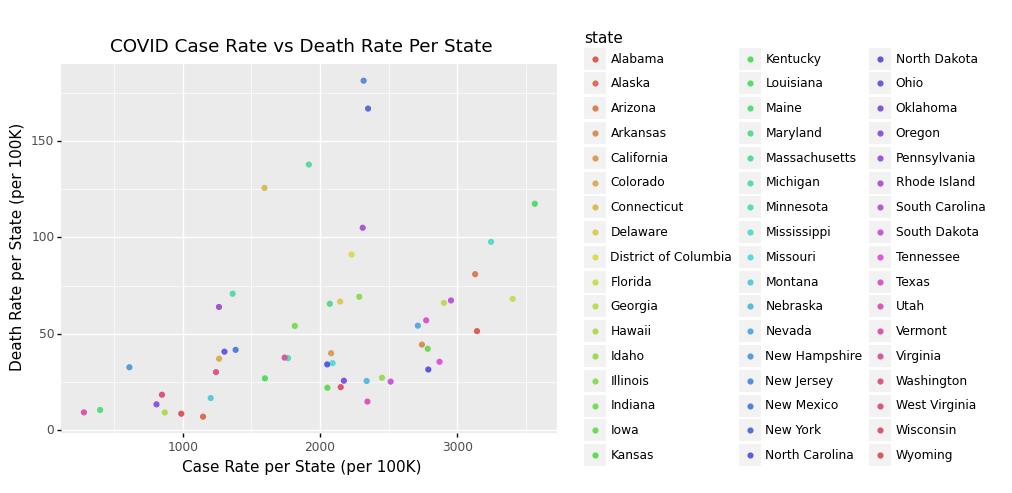

<ggplot: (311327985)>

In [25]:
#Created a scatterplot mapping state cases to deaths per 100,000
(ggplot(usa_covid, aes(x='total_cases_per100k', y='total_deaths_per100k', color = 'state')) +
xlab("Case Rate per State (per 100K)") +
ylab("Death Rate per State (per 100K)") +
ggtitle("COVID Case Rate vs Death Rate Per State") + geom_point())

#### (c) Display the average length of stay at home orders and the median length (including states that didn’t implement any order). Additionally, find the state(s) that had the shortest stay-at-home orders among states that did implement an order.

In [26]:
#Created a new column 'Days' which captures the total stay at home length
usa_covid["Days"] = (usa_covid['Temp_last'] - usa_covid['First_date']).dt.days #.dt.days outputs the number of days for each element

#Filled all NaN values with 0
usa_covid = usa_covid.fillna(0)

In [27]:
#Printed the mean of the 'Days' column and rounded that value to 2 decimal places
print("The average stay at home order was", round(usa_covid.Days.mean(),2))

The average stay at home order was 52.9


In [28]:
#Printed the median of the 'Days' column
print("The median stay at home order was", usa_covid.Days.median())

The median stay at home order was 45.0


In [29]:
#Interpreting "implement an order" to be a "Yes" in the enforcement column
#Created a dataframe called "order_yes" where I filtered for value where enforcement was 'Yes'
order_yes = usa_covid.query("enforcement == 'Yes'")

#Sorted 'Days' column from least to greatest in order to find out what states had the shortest stay at home orders
order_yes.groupby("state")["Days"].min().sort_values().head(2) #Only chose the first 2 values based on visual inspection of the data

state
Alaska     28.0
Georgia    28.0
Name: Days, dtype: float64

### Question 4

#### (a)  Compare the correlations of cases and deaths per 100,000 residents with the demographic variables contained in the state_ACS_data.csv file as well as the percentage of votes for Donald Trump. Briefly comment on any patterns you notice.

In [30]:
#Created a new dataframe from 'usa_covid' only including certain columns and changed NaN values to 0
graph_covid = usa_covid.filter(["state", "cases","deaths","deaths_per100k", "cases_per100k","Pct_White_Non_Hispanic","trump_2016_vote_share", "State_Population", "Pct_Population_in_Poverty", "Median_Household_Income", "Pct_Population_No_Health_Insurance"]).fillna(0)

In [31]:
#Changing 'trump_2016_vote_share' from a string to float by splitting the value by the "%" sign and renaming this column to follow the format of the other, similar, columns
graph_covid['Pct_trump_2016_vote_share'] = (graph_covid.trump_2016_vote_share.str.strip('%').astype("float"))

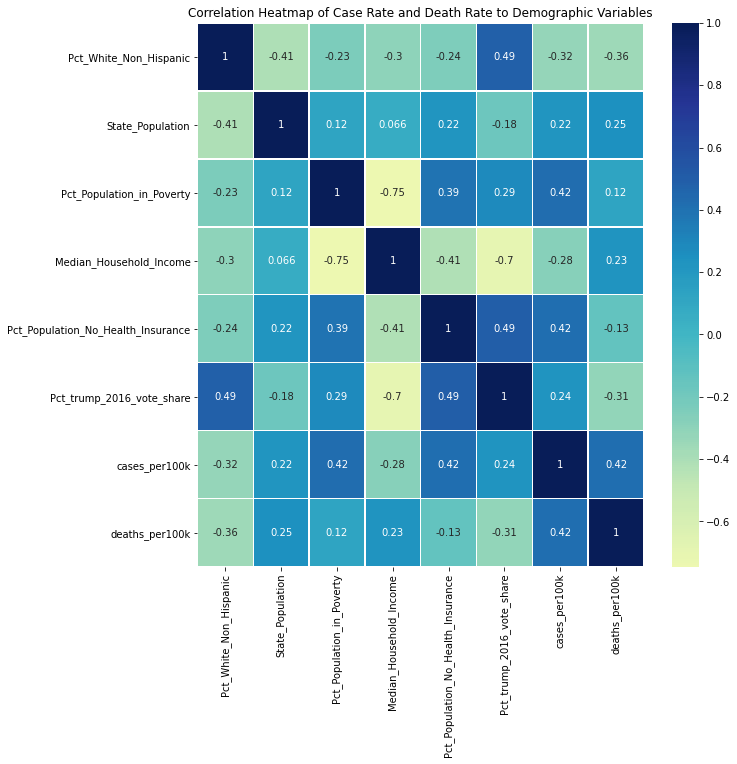

In [32]:
#Created a new column that would get the case avg per state and then multiplied it by 100,000
graph_covid['cases_per100k'] = (graph_covid['cases']/graph_covid['State_Population'])*100000

#Created a new column that would get the death avg per state and then multiplied it by 100,000
graph_covid['deaths_per100k'] = (graph_covid['deaths']/graph_covid['State_Population'])*100000

#Created a variable that only selected the float datatype and calculated the respective correlation
demo_corr = graph_covid.select_dtypes(include=['float64']).corr()

#Plotted the "demo_corr" variable by creating a correlation heatmaps
plt.figure(figsize = (10,10))
sns.heatmap(demo_corr, center=0, linewidths=.5, cmap = "YlGnBu", annot=True)#Used the 'annot' value to provide the exact correlation values
plt.title ('Correlation Heatmap of Case Rate and Death Rate to Demographic Variables')
plt.show()

If we take a look at the last 2 rows of the heatmap we notice that, in general, there are fairly weak correlations between *cases_per100k* and the demographic variables, along with *deaths_per100k* and the demographic variables. The stronger correlations here being between *cases_per100k* and *Pct_Population_in_Poverty* or *Pct_Population_No_Health_Insurance* at 0.42. And *deaths_per100k* with *Pct_White_Non_Hispanic* at -0.36.

####  (b) For the demographic variable that is most strongly correlated with deaths per 100,000 residents, create a scatterplot of this variable on the x-axis, against deaths per 100,000 on the y-axis. (Points: 2)

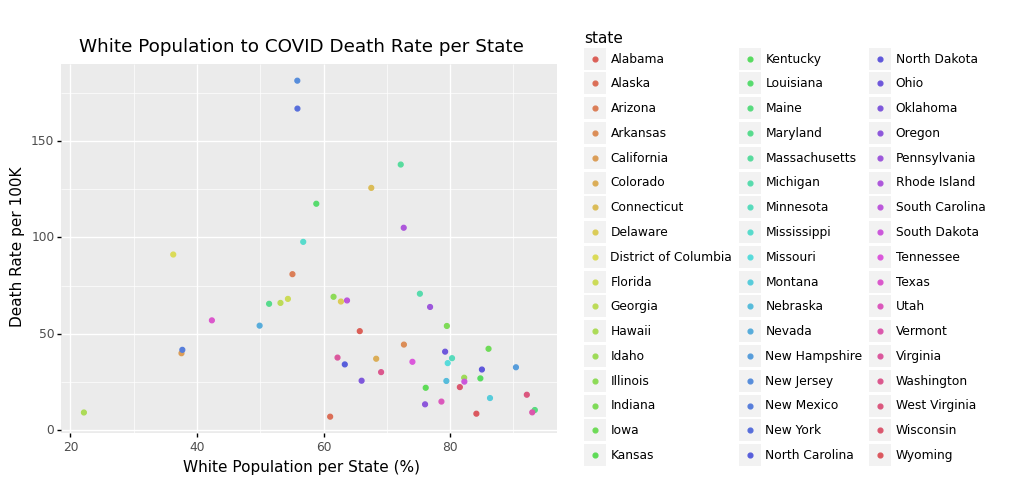

<ggplot: (311628966)>

In [33]:
#From the last question the most strongly correlated demographic variable was 'Pct_White_Non_Hispanic'
#Created a scatterplot mapping the percentage of white people per state to deaths per 100,000 per state
(ggplot(graph_covid, aes(x='Pct_White_Non_Hispanic', y='deaths_per100k', color = 'state')) +
xlab("White Population per State (%)") +
ylab("Death Rate per 100K") +
ggtitle("White Population to COVID Death Rate per State") + geom_point())

## Part II: COVID Data Over Time

### Question  1

#### Using the original data from the us_states.csv file, find the state that has recorded the highest number of new cases per 100,000 residents between September 1 and September 28, inclusive. Display the state and the number of new cases per 100,000 residents.

In [50]:
ACS.state.drop_duplicates().count()

52

In [65]:
#Outer merged "states" with "ACS" on 'states' in order to get the state population and cases column in one dataframe
states_popn = states.merge(ACS, how = 'outer', on =["state"])

#Dropped irrelevent columns
states_popn = states_popn.drop(columns = ["fips", "State_FIPS", "Pct_White_Non_Hispanic", "Pct_Population_in_Poverty", "Median_Household_Income", "Pct_Population_No_Health_Insurance"])

In [66]:
#Created 2 variables to encapsulate the start and end dates that we want to filter our data by
START_DATE = '2020-08-31' #Including August 31st in order to get the new cases for September 1st
END_DATE = '2020-09-28'

#Created a 'days_29' filter that includes values from August 31st to September 28
days_29 = (states_popn['date'] >= START_DATE) & (states_popn['date'] <= END_DATE)

#Created a new dataframe that only includes state covid rates for the month of September
states_sept = states_popn.loc[days_29].reset_index(drop = True) #Filtered by the 'days_29' variable using the loc method and reset the index

#Sorted the "states_sept" dataframe by state and dates in order to group states together
states_sept = states_sept.sort_values(['state', 'date'])

#Created a new column for "states_sept" that would get the daily cases per state per date, and filled and NaN values with "0"
states_sept['daily_case'] = states_sept.groupby(['state'])['cases'].diff(periods = 1).fillna(0)#Used the pandas diff function to take the difference between 2 dates per state to get the daily case rate

#Created a new column for "states_sept" that would take the daily case rate divide it by the state population and mutiply that value by 100000
states_sept['daily_popn_100k'] = ((states_sept['daily_case']/states_sept['State_Population'])*100000)

In [68]:
#Summed the daily case rate per state in order to get the "monthly" total new cases
#used the 'idmax' method to determine what state had the highest number of new cases
print("State with the highest number of new cases per 100,000 residents:",((states_sept.groupby(['state'])['daily_popn_100k'].sum())).idxmax())

#Summed the daily case rate per state in order to get the "monthly" total new cases
#used the 'max' method to determine what was the highest number of cases for per 100,000 residents
print("The highest number of new cases per 100,000 residents:",((states_sept.groupby(['state'])['daily_popn_100k'].sum())).max())

State with the highest number of new cases per 100,000 residents: North Dakota
The highest number of new cases per 100,000 residents: 1218.5572739201357


### Question  2

#### Using the original data from the us_states.csv file, create new variables equal to the number of daily new cases and deaths. Display summary statistics for these two variables.

In [37]:
#Created a new dataframe sorting the values by state and dates in order to group states together
states_sorted = states.sort_values(['state', 'date']).reset_index(drop = True)

#Created a new variable for "states_sorted" that would get the daily cases per state per date
daily_c = states_sorted.groupby(['state'])['cases'].diff(periods = 1) #Used the pandas diff function to take the difference between 2 dates per state to get the daily case rate

#Generated descriptive statistics for 'daily_c'
daily_c.describe()

count    11509.000000
mean       623.544009
std       1296.165924
min      -7757.000000
25%         38.000000
50%        225.000000
75%        688.000000
max      22276.000000
Name: cases, dtype: float64

In [38]:
#Created a new variable for "states_sorted" that would get the daily deaths per state per date
daily_d = states_sorted.groupby(['state'])['deaths'].diff(periods = 1)

#Generated descriptive statistics for 'daily_d'
daily_d.describe()

count    11509.000000
mean        17.806934
std         55.867778
min       -102.000000
25%          0.000000
50%          4.000000
75%         15.000000
max       1877.000000
Name: deaths, dtype: float64

### Question  3

#### Pick a state that had a stay at home order that expired (before September 28) and generate a plot of daily new cases. Add vertical lines corresponding to the start and end dates of the stay-at-home order. Comment briefly on any patterns you notice.

In [39]:
#Queried for just "North Carolina" in the states dataframe, reset the index and saved this dataframe as "nc"
nc = states.query("state == 'North Carolina'").reset_index(drop = True)

#Created a new column for "nc" that would get the daily cases per date
nc['daily'] = nc.groupby(["state"])["cases"].diff(periods = 1) #Used the pandas diff function to take the difference between 2 dates per state to get the daily case rate

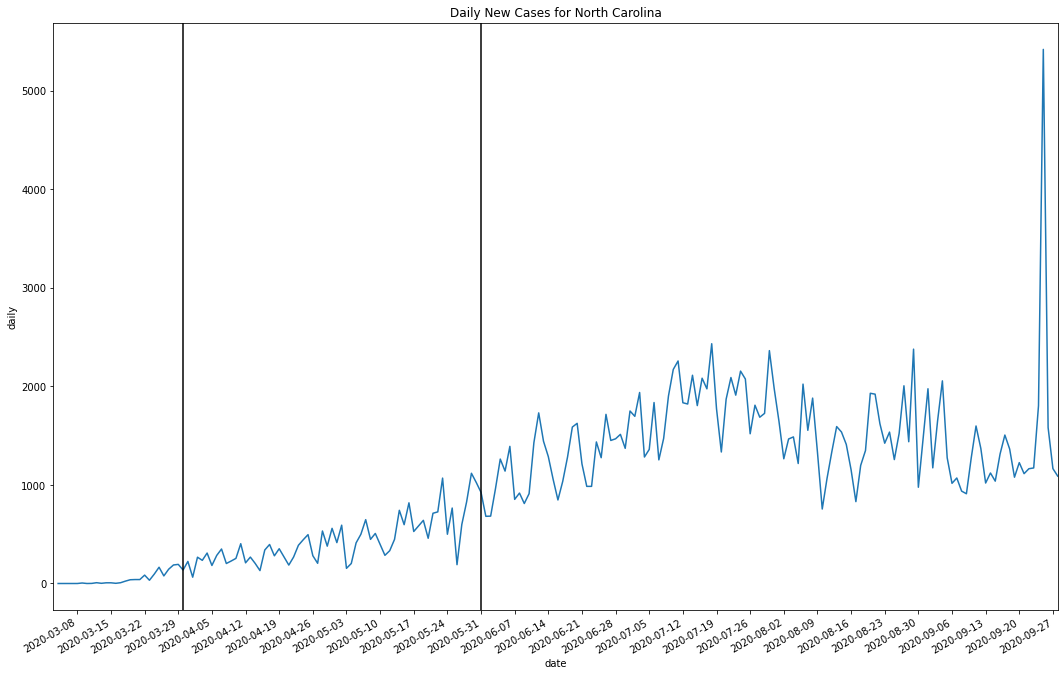

In [40]:
#Used seaborn to create a line graph
fig, ax = plt.subplots(figsize=(18, 12)) #Set the figure size as 18 x 12
ax = sns.lineplot(data = nc, x = "date", y = "daily") #Set the x value and y values of the plot
ax.set_title("Daily New Cases for North Carolina") #Set the title
ax.set_xlim(['2020-03-03', '2020-09-28']) #Limited the dates to only include when COVID hit North Carolina

#Specified the position of the major ticks at the beginning of the week for the plot
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
#Used the following module to rotate them and right align the dates
fig.autofmt_xdate()

#Created a horizontal line indicating when stay at home orders were in effect for North Carolina
plt.axvline('2020-03-30', color = 'black')
plt.axvline('2020-05-31', color = 'black')

The first thing that jumps out at use the outlier that took place on September 25th. At first I assumed that there was a hotspot or an outbreak at a city within the state but more a quick google search tells us that this massive uptick in cases came from, "a sudden spike attributed [with] the state’s one-time addition of new testing data that dates to May 20, when the first antigen positive case was reported." (https://www.newsobserver.com/news/coronavirus/article245991830.html).

If we exclude that one data point the stay at home order was still negligible and didn't help with curbing overall cases in the state. Much like the rest of the country we peaked around July to August but COVID cases have been hovering around the same level for the past 4 months.

### Question  4

#### Create a new DataFrame that contains the number of daily new cases and deaths per 100,000 residents among the states that Donald Trump won and the states that Hillary Clinton won (i.e., for a given date you should have one observation corresponding to the group of states that voted for Trump in 2016, and another corresponding to the group of states that voted for Clinton). Plot the number of daily new deaths per 100,000 over time in these two groups of states, using appropriate colors (i.e., red and blue) for the corresponding lines. Comment briefly on any patterns you notice.

In [74]:
#Merged "election" and "ACS" in order to get the 'trump_won' column and 'State_Population' column in one dataframe
trump_popn = election.merge(ACS, how = 'outer', on =["state"])

#Filtered for just the 50 states and DC
trump_popn = trump_popn.query("state != 'Puerto Rico'")

#Dropped irrelevent columns
trump_popn = trump_popn.drop(columns = ["state", "trump_2016_vote_share", "State_FIPS", "Pct_White_Non_Hispanic", "Pct_Population_in_Poverty", "Median_Household_Income", "Pct_Population_No_Health_Insurance"])

#Created a pivot table that would be summing 'State_Population' depending the 'trump_won' column
#Note it is here that 'State_population' represets the total population per state per 'trump_won' status rather than just simply the state's popluation.
trump_popn = trump_popn.pivot_table(index = "trump_won", values = "State_Population", aggfunc=np.sum)

#Renamed 'State_population' into 'Total_population' 
trump_popn = trump_popn.rename(columns={"State_Population": "Total_Population"})

In [75]:
#Merged "election" and "states" on the 'state' column via an outer join and saving this new datatframe as "parties"
parties = election.merge(states, how = 'outer', on =["state"])

#Used the dropna function to remove any rows that had a null value in the 'trump_won' column
parties = parties.dropna(0, how = 'any', subset = ['trump_won']).reset_index(drop = True)

#Right merged "trump_popn" and "parties" on "trump_won" to get all relevent columns into one dataframe
parties_popn = trump_popn.merge(parties, how = 'right', on =["trump_won"])

In [76]:
#Created a new column for "parties_popn" that would get the daily cases per state per date
parties_popn["daily_cases"] = parties_popn.groupby(['state'])['cases'].diff(periods = 1)

#Created a new column that would get the daily cases per state, divide that value by the 'Total_population', and then multiplied it by 100,000
parties_popn['daily_cases_100k'] = (parties_popn['daily_cases']/parties_popn['Total_Population'])*100000

#Created a new column for "parties_popn" that would get the daily deaths per state per date
parties_popn["daily_deaths"] = parties_popn.groupby(['state'])['deaths'].diff(periods = 1)

#Created a new column that would get the daily death per state, divide that value by the 'Total_population', and then multiplied it by 100,000
parties_popn['daily_deaths_100k'] = (parties_popn['daily_deaths']/parties_popn['Total_Population'])*100000

In [78]:
#Summed 'daily_cases_100k' and 'daily_deaths_100k' by 'date' and 'trump_won', reset the index and resaved this dataframe as "parties_popn"
parties_popn = parties_popn.groupby(["date", "trump_won"])["daily_cases_100k", "daily_deaths_100k"].sum().reset_index()

#Pivoted "parties_popn" by 'date', 'trump_won', and 'daily_deaths_100k' and saved this new dataframe as 'pivoted_popn'
pivoted_popn = parties_popn.pivot("date", "trump_won","daily_deaths_100k")

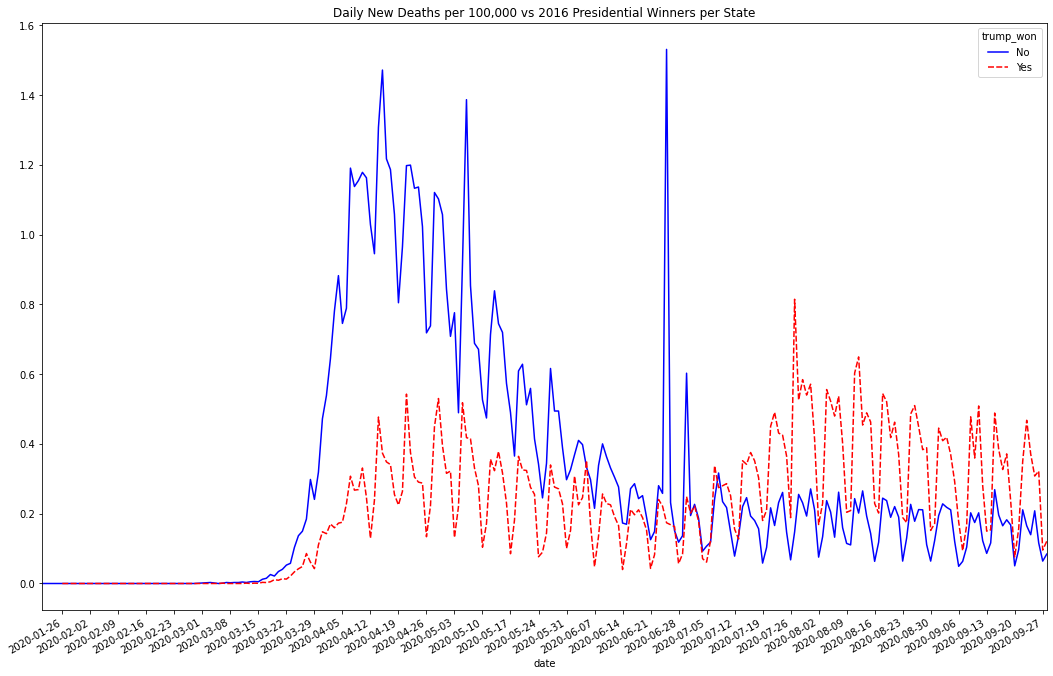

In [79]:
#Created an array of custom colors just including blue and red
colors = ["#0000FF", "#FF0000"]

#Setting the custom pallette
sns.set_palette(sns.color_palette(colors))

#Used seaborn to create a line graph
fig_2, ax_2 = plt.subplots(figsize=(18, 12)) #Set the figure size as 18 x 12
ax_2= sns.lineplot(data = pivoted_popn) #Graphed "pivoted_popn"
ax_2.set_title("Daily New Deaths per 100,000 vs 2016 Presidential Winners per State") #Set the title
ax_2.set_xlim(['2020-01-21', '2020-09-28']) #Limited the dates to only include when COVID hit the US

#Specified the position of the major ticks at the beginning of the week for the plot
ax_2.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
#Used the following module to rotate them and right align the dates
fig_2.autofmt_xdate()

The first thing to note is that this data is being heavily skewed by New York. As we all know the Tri-State area was the hardest hit in the beginning and had an insane number of cases compared to the rest of the country. If we remove the New York data I believe we will have a better idea of how COVID cases compared to the 2016 election results per state.

And the second pattern that arises is that states that mostly went for Trump currently have the highest number cases. This also tracks as these were the states that were the most likely to open up much quicker, have shorter state at home orders and are less likely to enforce wearing masks.

The last thing to note is the random spike in the data for states that went with Clinton in the middle of June. If we take our learnings from the North Carolina data this spike is more likely due to a backlog of reporting cases rather than a single hotspot event.